# batch normalization이 미치는 영향

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
import numpy as np

#np.set_printoptions(threshold=np.inf, linewidth=np.inf)

In [2]:
torch.manual_seed(1)

mnist_train = datasets.MNIST(root='MNIST_data/', train=True, download=True, transform=transforms.ToTensor())
mnist_test = datasets.MNIST(root='MNIST_data/', train=False, download=True, transform=transforms.ToTensor())

train_loader = DataLoader(dataset=mnist_train, batch_size=32, shuffle=False, drop_last=True)
train_test = DataLoader(dataset=mnist_test, batch_size=32, shuffle=False, drop_last=True)

C:\Users\DMQA\anaconda3\envs\main\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [7]:
linear1 = nn.Linear(784,32,bias=True)
linear2 = nn.Linear(32,32,bias=True)
linear3 = nn.Linear(32,32,bias=True)

class basic_model(nn.Module):
    def __init__(self):
        super(basic_model, self).__init__()
        self.fc1 = linear1
        self.fc2 = linear2
        self.fc3 = linear3
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.fc1(x)
        print(out)
        out = self.relu(out)
        print(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out

class batchnorm_model(nn.Module):
    def __init__(self):
        super(batchnorm_model,self).__init__()
        self.fc1 = linear1
        self.fc2 = linear2 
        self.fc3 = linear3
        self.relu = nn.ReLU()
        self.batch1 = nn.BatchNorm1d(32)
        self.batch2 = nn.BatchNorm1d(32)
    
    def forward(self, x):
        out = self.fc1(x)
        print(out)
        out = self.batch1(out)
        print(out)
        out = self.relu(out)
        print(out)
        out = self.fc2(out)
        out = self.batch2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out

In [9]:
base_model = basic_model()

for epoch in range(1):
    for X,Y in train_loader:
        X = X.view(-1, 28*28)
        Y = Y

        base_predict = base_model(X)
        break

tensor([[-0.1250,  0.2667, -0.0691,  ...,  0.0338,  0.1995, -0.7375],
        [ 0.0489,  0.1386, -0.2254,  ...,  0.0702,  0.1072, -0.5416],
        [-0.2138, -0.1810, -0.1133,  ...,  0.0398,  0.1150, -0.2616],
        ...,
        [-0.1116, -0.0278,  0.0118,  ...,  0.0312,  0.0364, -0.1396],
        [-0.1603, -0.0657,  0.2640,  ...,  0.2576, -0.0282, -0.2971],
        [ 0.2063,  0.2765, -0.0191,  ..., -0.2898, -0.0010, -0.6564]],
       grad_fn=<AddmmBackward>)
tensor([[0.0000, 0.2667, 0.0000,  ..., 0.0338, 0.1995, 0.0000],
        [0.0489, 0.1386, 0.0000,  ..., 0.0702, 0.1072, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0398, 0.1150, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0118,  ..., 0.0312, 0.0364, 0.0000],
        [0.0000, 0.0000, 0.2640,  ..., 0.2576, 0.0000, 0.0000],
        [0.2063, 0.2765, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
       grad_fn=<ReluBackward0>)


In [10]:
bn_model = batchnorm_model()

for epoch in range(1):
    for X,Y in train_loader:
        X = X.view(-1, 28*28)
        Y = Y

        bn_model_predict = bn_model(X)
        break

tensor([[-0.1250,  0.2667, -0.0691,  ...,  0.0338,  0.1995, -0.7375],
        [ 0.0489,  0.1386, -0.2254,  ...,  0.0702,  0.1072, -0.5416],
        [-0.2138, -0.1810, -0.1133,  ...,  0.0398,  0.1150, -0.2616],
        ...,
        [-0.1116, -0.0278,  0.0118,  ...,  0.0312,  0.0364, -0.1396],
        [-0.1603, -0.0657,  0.2640,  ...,  0.2576, -0.0282, -0.2971],
        [ 0.2063,  0.2765, -0.0191,  ..., -0.2898, -0.0010, -0.6564]],
       grad_fn=<AddmmBackward>)
tensor([[-0.3849,  1.2483, -0.3701,  ...,  0.3018,  0.7658, -1.8464],
        [ 0.8460,  0.4542, -1.5535,  ...,  0.5685,  0.2573, -0.9579],
        [-1.0134, -1.5276, -0.7049,  ...,  0.3455,  0.3003,  0.3122],
        ...,
        [-0.2901, -0.5780,  0.2422,  ...,  0.2827, -0.1326,  0.8654],
        [-0.6352, -0.8131,  2.1516,  ...,  1.9398, -0.4883,  0.1510],
        [ 1.9593,  1.3094,  0.0080,  ..., -2.0672, -0.3385, -1.4782]],
       grad_fn=<NativeBatchNormBackward>)
tensor([[0.0000, 1.2483, 0.0000,  ..., 0.3018, 0.7658, 0.0

In [4]:
base_model = basic_model()
base_criterion = torch.nn.CrossEntropyLoss()
base_optimizer = optim.Adam(base_model.parameters(), lr=0.001)

base_train_loss = []
base_test_loss = []

for epoch in range(1):
    base_model.train()

    for X,Y in train_loader:
        X = X.view(-1, 28*28)
        Y = Y

        base_optimizer.zero_grad()
        base_predict = base_model(X)
        base_loss = base_criterion(base_predict, Y)
        base_loss.backward()
        base_optimizer.step()

        break
        

tensor([[-0.0670, -0.0555, -0.1320,  ..., -0.2561,  0.4735,  0.2064],
        [ 0.1682, -0.0104, -0.3163,  ...,  0.0014,  0.3961, -0.0819],
        [-0.0427, -0.0915, -0.0578,  ..., -0.1353,  0.2736, -0.0332],
        ...,
        [-0.1127,  0.1074, -0.0797,  ..., -0.0825,  0.2056,  0.1114],
        [-0.1161,  0.2110,  0.1304,  ..., -0.1562,  0.2155,  0.3483],
        [-0.2512,  0.1737, -0.3614,  ...,  0.1445,  0.3043, -0.0791]],
       grad_fn=<AddmmBackward>)
tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.4735, 0.2064],
        [0.1682, 0.0000, 0.0000,  ..., 0.0014, 0.3961, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.2736, 0.0000],
        ...,
        [0.0000, 0.1074, 0.0000,  ..., 0.0000, 0.2056, 0.1114],
        [0.0000, 0.2110, 0.1304,  ..., 0.0000, 0.2155, 0.3483],
        [0.0000, 0.1737, 0.0000,  ..., 0.1445, 0.3043, 0.0000]],
       grad_fn=<ReluBackward0>)


In [5]:

bn_model = batchnorm_model()
bn_criterion = torch.nn.CrossEntropyLoss()
bn_optimizer = optim.Adam(bn_model.parameters(), lr=0.001)

bn_train_loss = []
bn_test_loss = []

for epoch in range(1):
    bn_model.train()

    for X,Y in train_loader:
        X = X.view(-1, 28*28)
        Y = Y

        bn_optimizer.zero_grad()
        bn_predict = bn_model(X)
        bn_loss = bn_criterion(bn_predict, Y)
        bn_loss.backward()
        bn_optimizer.step()

        break

tensor([[-0.0258, -0.0024, -0.0681,  ..., -0.2877,  0.5658,  0.1672],
        [ 0.2727,  0.0253, -0.2491,  ..., -0.0699,  0.4737, -0.1070],
        [-0.0257, -0.0828, -0.0187,  ..., -0.1203,  0.3425, -0.0672],
        ...,
        [-0.0843,  0.1021, -0.0649,  ..., -0.0545,  0.2261,  0.1158],
        [-0.1132,  0.2421,  0.2139,  ..., -0.1632,  0.3028,  0.3021],
        [-0.1887,  0.2410, -0.3315,  ...,  0.1818,  0.3925, -0.1138]],
       grad_fn=<AddmmBackward>)
tensor([[ 1.9752e-01, -6.9148e-01, -3.0383e-01,  ..., -1.2627e+00,
          6.3101e-01,  7.4280e-01],
        [ 2.9744e+00, -5.0733e-01, -1.8019e+00,  ...,  1.6190e-01,
          1.8298e-01, -1.4799e+00],
        [ 1.9850e-01, -1.2254e+00,  1.0448e-01,  ..., -1.6815e-01,
         -4.5468e-01, -1.1567e+00],
        ...,
        [-3.4700e-01,  2.9168e-03, -2.7751e-01,  ...,  2.6234e-01,
         -1.0206e+00,  3.2635e-01],
        [-6.1523e-01,  9.3232e-01,  2.0291e+00,  ..., -4.4855e-01,
         -6.4783e-01,  1.8364e+00],
      

In [6]:
bn_model = batchnorm_model()
bn_criterion = torch.nn.CrossEntropyLoss()
bn_optimizer = optim.Adam(bn_model.parameters(), lr=0.001)

bn_train_loss = []
bn_test_loss = []


In [7]:
for names in base_model.state_dict():
    print(names)
    print(base_model.state_dict()[names])

for name in bn_model.state_dict():
    print(name)
    print(bn_model.state_dict()[name])

fc1.weight
tensor([[ 0.0184, -0.0158, -0.0069,  ...,  0.0068, -0.0041,  0.0025],
        [-0.0274, -0.0224, -0.0309,  ..., -0.0029,  0.0013, -0.0167],
        [ 0.0282, -0.0095, -0.0340,  ..., -0.0141,  0.0056, -0.0335],
        ...,
        [ 0.0226,  0.0331,  0.0182,  ...,  0.0150,  0.0278, -0.0073],
        [-0.0210,  0.0144,  0.0214,  ..., -0.0308, -0.0335,  0.0085],
        [ 0.0219,  0.0195, -0.0009,  ...,  0.0191,  0.0218, -0.0320]])
fc1.bias
tensor([-0.0307, -0.0331, -0.0263, -0.0178, -0.0344,  0.0138,  0.0016, -0.0208,
         0.0306, -0.0286,  0.0310,  0.0326,  0.0169,  0.0296,  0.0092, -0.0179,
         0.0081,  0.0100, -0.0235, -0.0033,  0.0248,  0.0040, -0.0298,  0.0020,
        -0.0164, -0.0129, -0.0136, -0.0267, -0.0161,  0.0283,  0.0218,  0.0234])
fc2.weight
tensor([[-0.1084, -0.1104,  0.1025,  ...,  0.0448,  0.0729,  0.1699],
        [-0.0593, -0.1072,  0.1283,  ..., -0.0471,  0.0327, -0.1190],
        [-0.1477, -0.1216,  0.0104,  ...,  0.0205,  0.0137, -0.1070],
    

# Train loss vs Test loss 비교하기

In [11]:
len(train_loader)

1875

In [8]:
base_model = basic_model()
base_criterion = torch.nn.CrossEntropyLoss()
base_optimizer = optim.Adam(base_model.parameters(), lr=0.001)

base_train_loss = []
base_test_loss = []

for epoch in range(15):
    base_model.train()
    avg_cost = 0

    for X,Y in train_loader:
        X = X.view(-1, 28*28)
        Y = Y

        base_optimizer.zero_grad()
        base_predict = base_model(X)
        base_loss = base_criterion(base_predict, Y)
        base_loss.backward()
        base_optimizer.step()

    avg_cost += base_loss / len(train_loader)
    base_train_loss.append(avg_cost.item())

    print('epoch: ', epoch, 'cost: ', avg_cost.item() )


        

epoch:  0 cost:  6.162463978398591e-05
epoch:  1 cost:  3.775424920604564e-05
epoch:  2 cost:  1.9667701053549536e-05
epoch:  3 cost:  1.3259685147204436e-05
epoch:  4 cost:  1.0538067726884037e-05
epoch:  5 cost:  8.068742317846045e-06
epoch:  6 cost:  6.615039183088811e-06
epoch:  7 cost:  6.827609922765987e-06
epoch:  8 cost:  6.708504315611208e-06
epoch:  9 cost:  5.4978104344627354e-06
epoch:  10 cost:  6.794320142944343e-06
epoch:  11 cost:  5.0577095862536225e-06
epoch:  12 cost:  6.226142886589514e-06
epoch:  13 cost:  1.1537786122062244e-05
epoch:  14 cost:  6.850424597359961e-06


In [9]:
base_train_loss

[6.162463978398591e-05,
 3.775424920604564e-05,
 1.9667701053549536e-05,
 1.3259685147204436e-05,
 1.0538067726884037e-05,
 8.068742317846045e-06,
 6.615039183088811e-06,
 6.827609922765987e-06,
 6.708504315611208e-06,
 5.4978104344627354e-06,
 6.794320142944343e-06,
 5.0577095862536225e-06,
 6.226142886589514e-06,
 1.1537786122062244e-05,
 6.850424597359961e-06]

<function matplotlib.pyplot.show(close=None, block=None)>

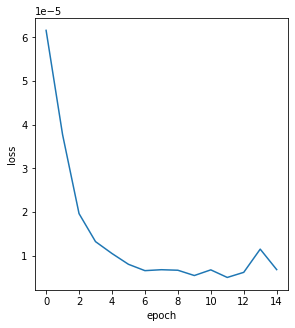

In [10]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(range(15),base_train_loss)
plt.show